In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris, load_boston
from dtreeviz.trees import *

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

tita = pd.read_csv(r'C:\Users\kamil\Desktop\python course stuff\titanic-passengers.csv',
                   sep=';',)

tita.head()
tita.info()
tita.describe()

tita.isna().sum()/len(tita)*100
tita['Embarked'].value_counts().idxmax()

tita.drop('Cabin', axis=1, inplace=True)
tita.Age=tita.Age.fillna(tita.Age.mean())
tita.Embarked=tita.Embarked.fillna('S')

conv_dic= {"Sex":{"female":0, "male":1},"Survived":{"No":0,"Yes":1}}
tita.replace(conv_dic, inplace=True)
tita

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,C
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,C
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,S


In [2]:
#features extraction
x=tita.drop(["Survived", "Name", "Ticket", "Embarked","PassengerId"], axis=1)
y= tita["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
tree1 = tree.DecisionTreeClassifier()  
tree1.fit(x_train, y_train)   #fitting our model
y_pred=tree1.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.776536312849162


In [56]:
list(x.columns.values)

array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype=object)

In [3]:

import pydotplus
dot_data = tree.export_graphviz(tree1, out_file=None,
            feature_names=list(x.columns.values),

            filled=True, rounded=True,
            special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("titanicDecisionTree.pdf")

True

TypeError: can only concatenate str (not "int") to str

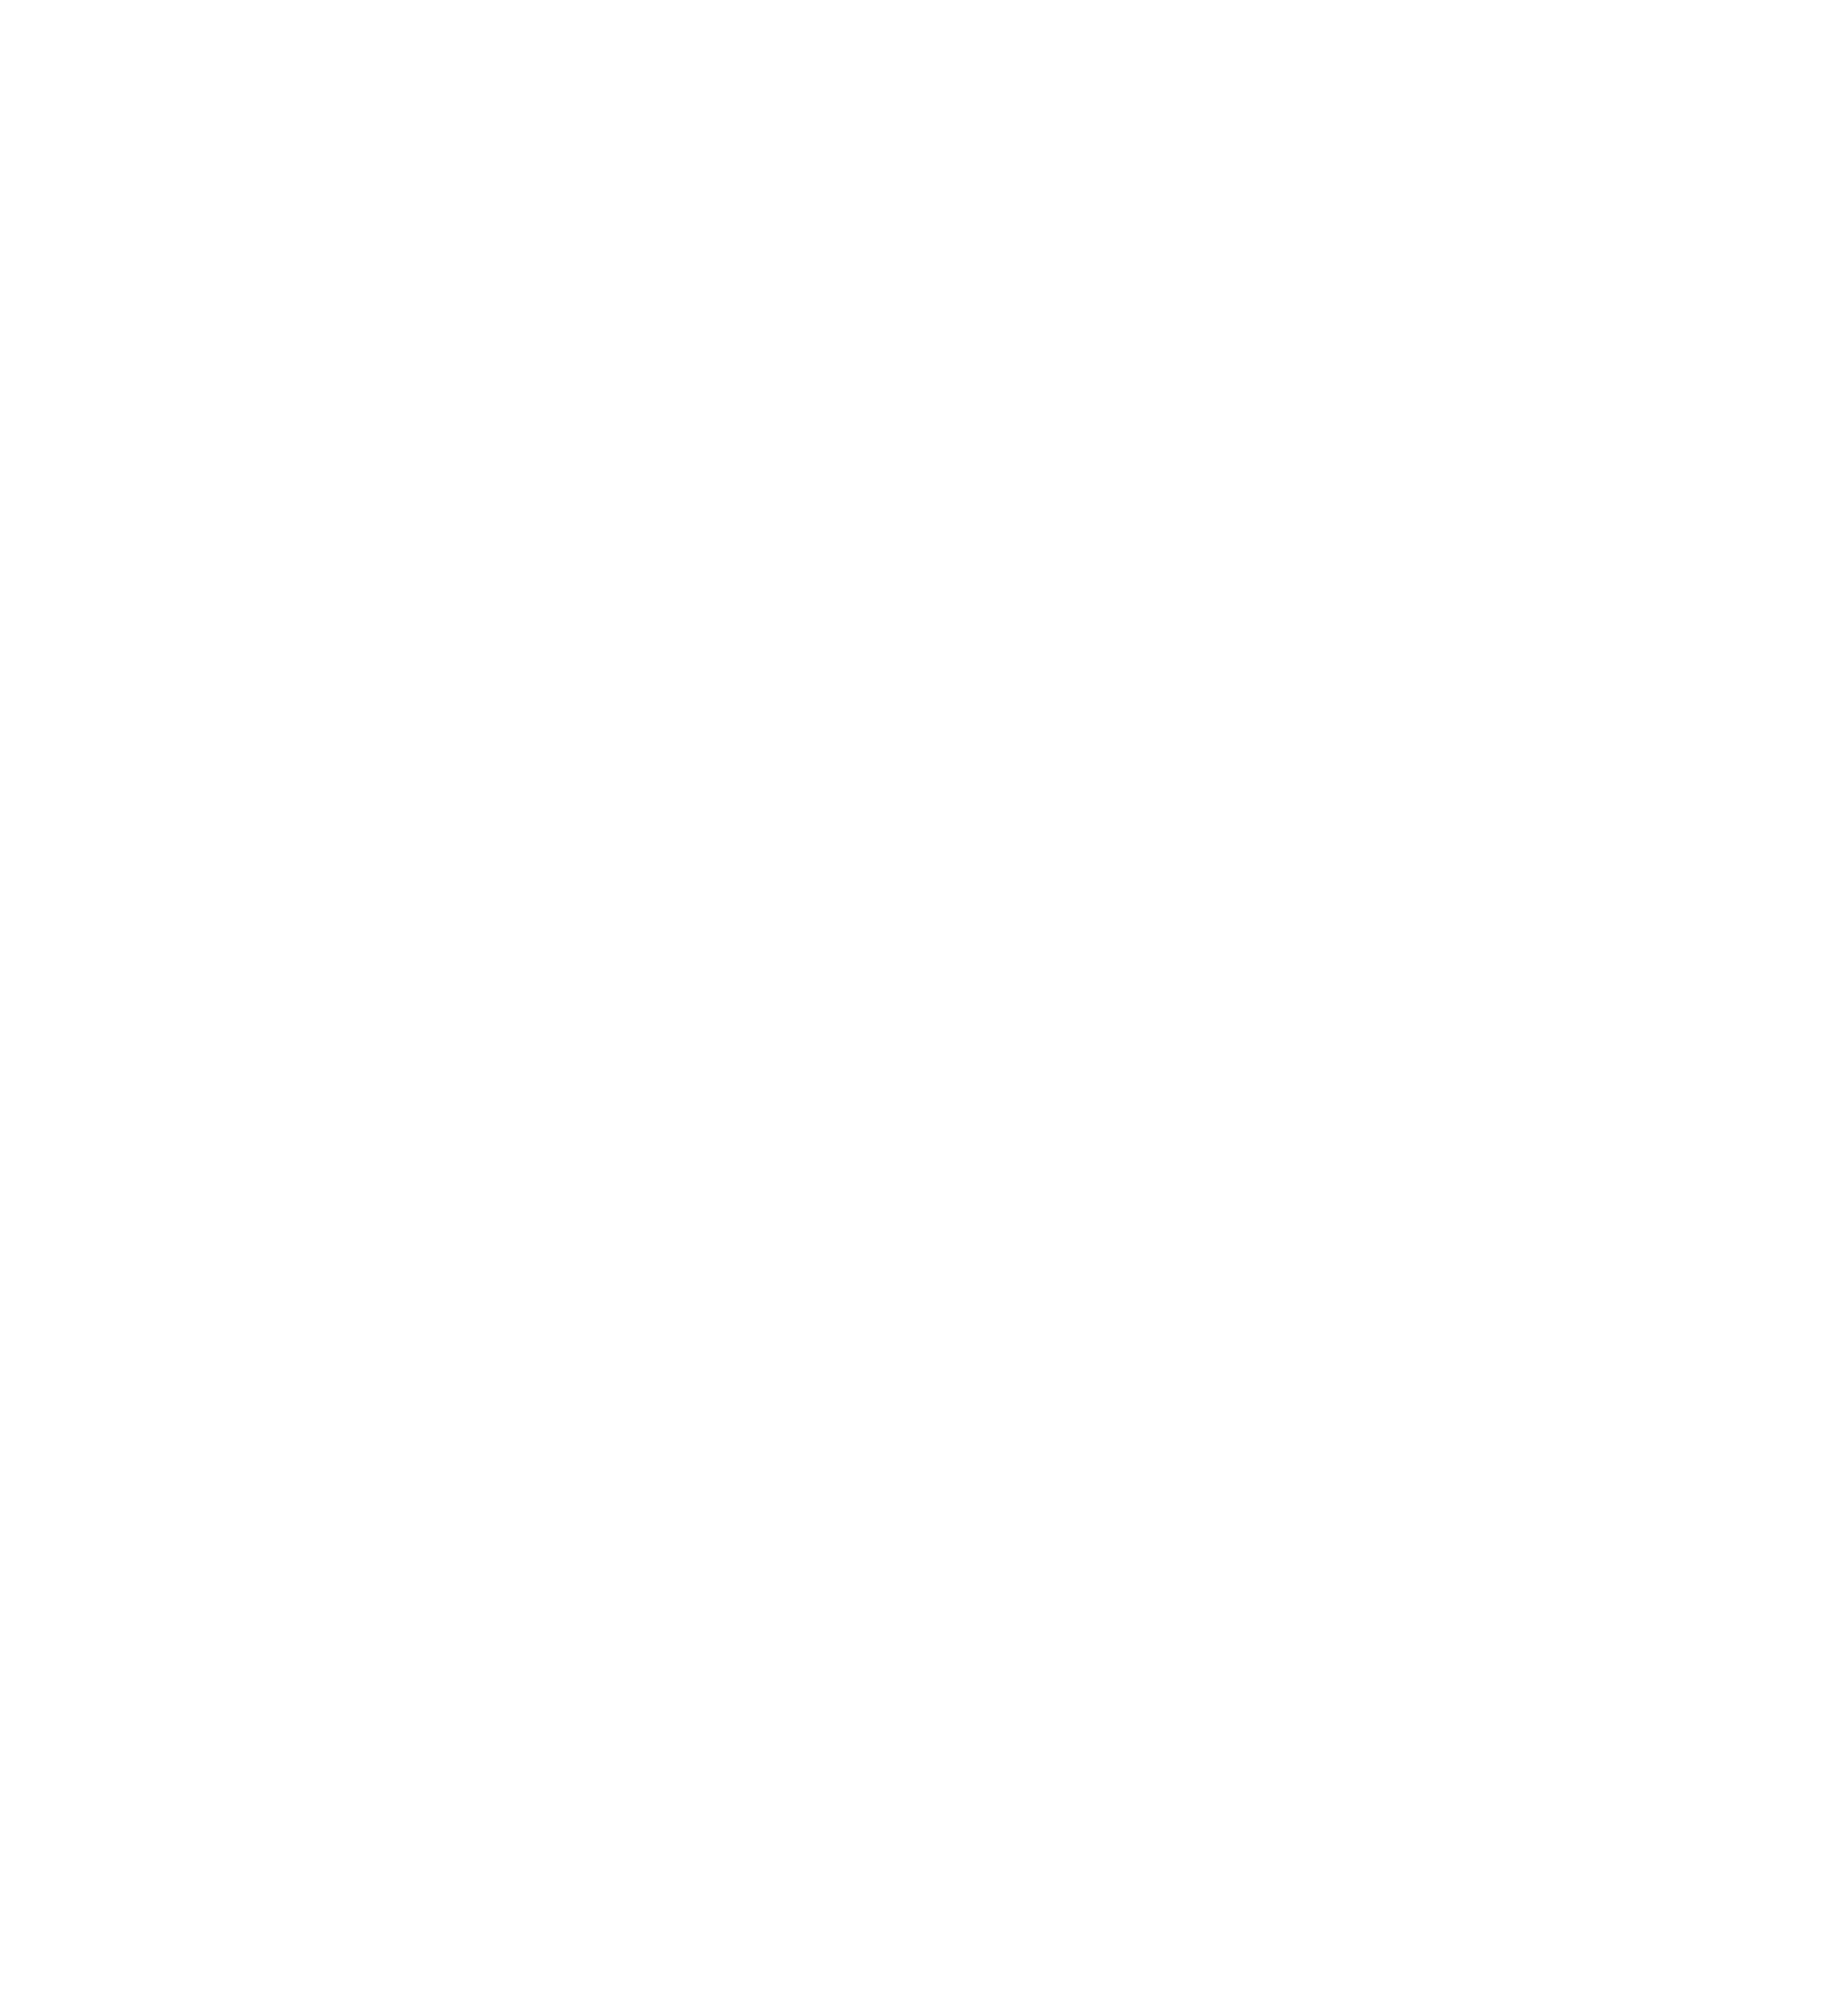

In [51]:
treeRep = tree.export_text(tree1)
fig = plt.figure(figsize=(40,45))
_ = tree.plot_tree(tree1,feature_names = list(x.columns.values),class_names= [0,1],filled = True)

In [47]:
dot_data = tree.export_graphviz(tree1, out_file=None, 
                                feature_names= list(x.columns.values),  
                                filled=True)
graphviz.Source(dot_data, format="png")

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

In [5]:
tree2=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
tree2.fit(x_train, y_train)  #Training our model
y_pred=tree2.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8268156424581006
